In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [79]:
df = pd.read_csv(r"C:\Users\Tanishq\Downloads\Sample - Superstore.csv.zip",compression="zip",encoding="latin1")
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [80]:
df.info


<bound method DataFrame.info of       Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
1          2  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
2          3  CA-2016-138688   6/12/2016   6/16/2016    Second Class   
3          4  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
4          5  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
...      ...             ...         ...         ...             ...   
9989    9990  CA-2014-110422   1/21/2014   1/23/2014    Second Class   
9990    9991  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9991    9992  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9992    9993  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9993    9994  CA-2017-119914    5/4/2017    5/9/2017    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520      

In [81]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [82]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [83]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df = df.sort_values('Order Date')
df=df.set_index('Order Date')
df.columns

Index(['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [84]:
monthly_sales = df.resample('M')['Sales'].sum() #groups the data by month.

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_19276\441816663.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M')['Sales'].sum() #groups the data by month.


In [85]:
# Naive forecast = previous month value
naive_preds = train.shift(1).iloc[-12:]

# Evaluate naive model
mae_naive = mean_absolute_error(test, naive_preds)

mae_naive


20532.179649999995

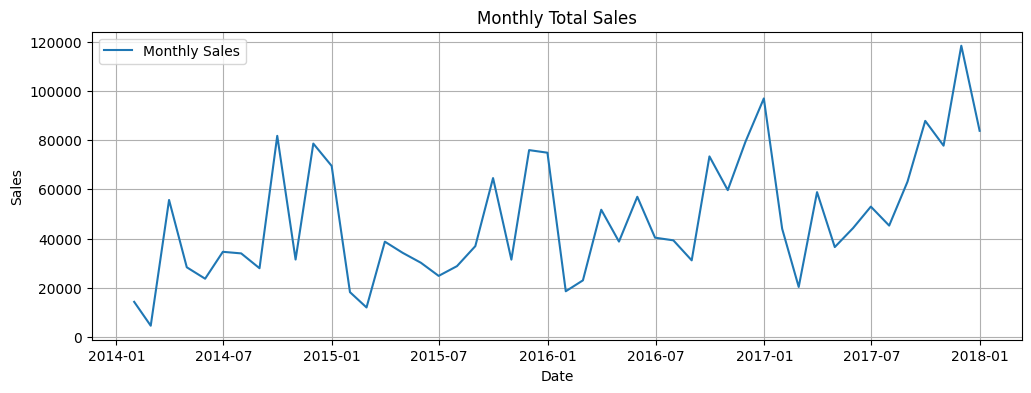

In [86]:
plt.figure(figsize=(12,4))
plt.plot(monthly_sales, label='Monthly Sales')
plt.title('Monthly Total Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.legend()
plt.show()

In [87]:
train = monthly_sales[:-12] # take everything except the last 12 months
test = monthly_sales[-12:]  # take only the last 12 months

In [88]:
# Naive forecast = previous month value
naive_preds = train.shift(1).iloc[-12:]

mae_naive = mean_absolute_error(test, naive_preds)

mae_naive


20532.179649999995

In [89]:
lr_df = pd.DataFrame(monthly_sales, columns=['Sales'])

# Lag features
lr_df['lag_1'] = lr_df['Sales'].shift(1)
lr_df['lag_3'] = lr_df['Sales'].shift(3)
lr_df['lag_6'] = lr_df['Sales'].shift(6)

# Rolling averages
lr_df['rolling_3'] = lr_df['Sales'].rolling(3).mean()
lr_df['rolling_6'] = lr_df['Sales'].rolling(6).mean()

# Seasonality
lr_df['month'] = lr_df.index.month

# Remove missing rows caused by lags
lr_df.dropna(inplace=True)

lr_df.head()


,Sales,lag_1,lag_3,lag_6,rolling_3,rolling_6,month
Order Date,,,,,,,
2014-07-31,33946.3930,34595.1276,28295.3450,14236.895,30729.935867,30116.008933,7
2014-08-31,27909.4685,33946.3930,23648.2870,4519.892,32150.329700,34014.271683,8
2014-09-30,81777.3508,27909.4685,34595.1276,55691.009,47877.737433,38361.995317,9
2014-10-31,31453.3930,81777.3508,33946.3930,28295.345,47046.737433,38888.336650,10
2014-11-30,78628.7167,31453.3930,27909.4685,23648.287,63953.153500,48051.741600,11


In [90]:
train_lr = lr_df.iloc[:-12]
test_lr  = lr_df.iloc[-12:]

X_train = train_lr.drop('Sales', axis=1)
y_train = train_lr['Sales']

X_test = test_lr.drop('Sales', axis=1)
y_test = test_lr['Sales']


In [91]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_preds = lr_model.predict(X_test)


In [92]:
mae_lr = mean_absolute_error(y_test, lr_preds)

mae_lr


9835.307186885624

In [93]:
print(f"Naive Forecast MAE: {mae_naive:.2f}")
print(f"Linear Regression MAE: {mae_lr:.2f}")


Naive Forecast MAE: 20532.18
Linear Regression MAE: 9835.31


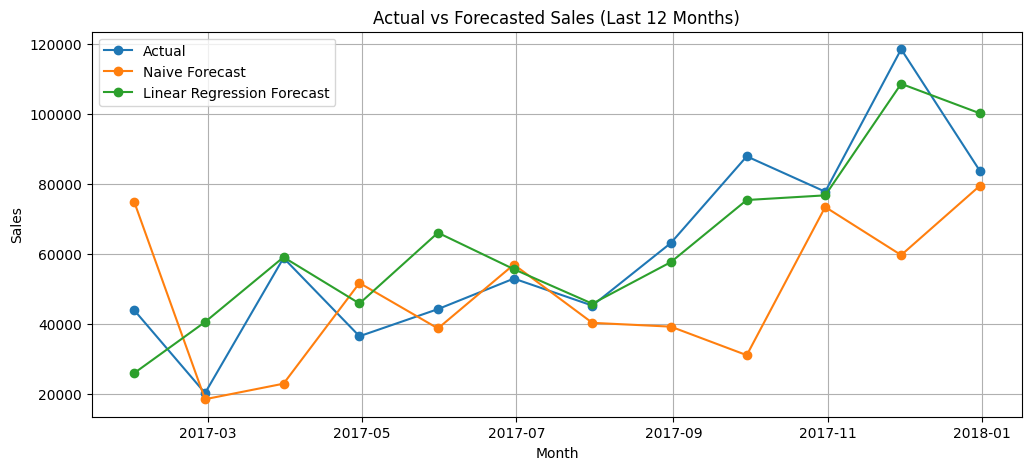

In [94]:
plt.figure(figsize=(12,5))

plt.plot(test.index, test.values, label='Actual', marker='o')
plt.plot(test.index, naive_preds.values, label='Naive Forecast', marker='o')
plt.plot(test.index, lr_preds, label='Linear Regression Forecast', marker='o')

plt.title('Actual vs Forecasted Sales (Last 12 Months)')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\Tanishq\AppData\Local\Temp\ipykernel_19276\1500693640.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(


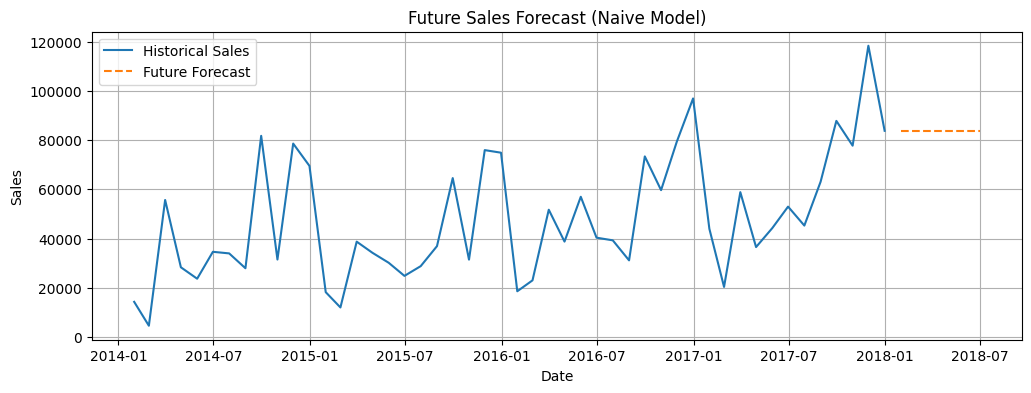

In [95]:
last_value = monthly_sales.iloc[-1]

future_dates = pd.date_range(
    start=monthly_sales.index[-1] + pd.offsets.MonthEnd(1),
    periods=6,
    freq='M'
)

future_forecast = pd.Series(
    [last_value] * 6,
    index=future_dates
)

plt.figure(figsize=(12,4))
plt.plot(monthly_sales, label='Historical Sales')
plt.plot(future_forecast, label='Future Forecast', linestyle='--')
plt.title('Future Sales Forecast (Naive Model)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

'git' is not recognized as an internal or external command,
operable program or batch file.


'git' is not recognized as an internal or external command,
operable program or batch file.
